In [1]:
import os
import re
import statistics
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math 
from tensorflow import keras
import tensorflow as tf
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import confusion_matrix
import random
accel_column_names = ['subject_id', 'activity', 'timestamp', 'x', 'y', 'z']


In [2]:
# Importing Acceleration Data 
def Load_Dataset(index):
    path = ('WISDM_dataset\\wisdm-dataset\\raw\\watch\\accel\\data_'+str(1600+index)+'_accel_watch.txt')
    df = pd.read_csv(path , header=None, names=accel_column_names)
    df.replace(regex=True, inplace=True, to_replace=r';', value=r'')
    df['z'] = df.z.astype(np.float64)
    df.dropna(axis=0, how='any', inplace=True)
    return df

df_0 = Load_Dataset(0)
df_1 = Load_Dataset(1)
df_2 = Load_Dataset(2)
df_3 = Load_Dataset(3)
df_4 = Load_Dataset(4)
df_5 = Load_Dataset(5)
df_6 = Load_Dataset(6)
df_7 = Load_Dataset(7)
df_8 = Load_Dataset(8)
df_9 = Load_Dataset(9)

df_list = [df_0, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9]
activities = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H','I', 'J','K', 'L', 'M', 'N', 'O',
             'P', 'Q','R', 'S']


In [3]:
# Importing Gyroscope data
gyro_column_names = ['subject_id', 'activity', 'timestamp', 'x', 'y', 'z']
def Load_gyro_Dataset(index):
    path = ('WISDM_dataset\\wisdm-dataset\\raw\\watch\\gyro\\data_'+str(1600+index)+'_gyro_watch.txt')
    df = pd.read_csv(path , header=None, names=gyro_column_names)
    df.replace(regex=True, inplace=True, to_replace=r';', value=r'')
    df['z'] = df.z.astype(np.float64)
    df.dropna(axis=0, how='any', inplace=True)
    return df
df_gyro_0 = Load_gyro_Dataset(0)
df_gyro_1 = Load_gyro_Dataset(1)
df_gyro_2 = Load_gyro_Dataset(2)
df_gyro_3 = Load_gyro_Dataset(3)
df_gyro_4 = Load_gyro_Dataset(4)
df_gyro_5 = Load_gyro_Dataset(5)
df_gyro_6 = Load_gyro_Dataset(6)
df_gyro_7 = Load_gyro_Dataset(7)
df_gyro_8 = Load_gyro_Dataset(8)
df_gyro_9 = Load_gyro_Dataset(9)
df_gyro_list = [df_gyro_0, df_gyro_1, df_gyro_2, df_gyro_3, df_gyro_4, df_gyro_5, df_gyro_6, df_gyro_7, df_gyro_8, df_gyro_9 ]
activities = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H','I', 'J','K', 'L', 'M', 'N', 'O',
             'P', 'Q','R', 'S']

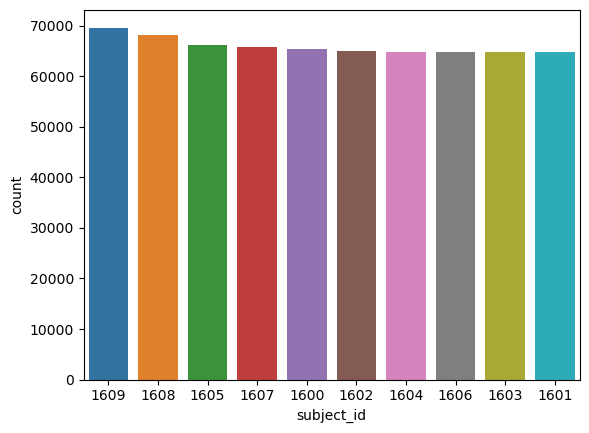

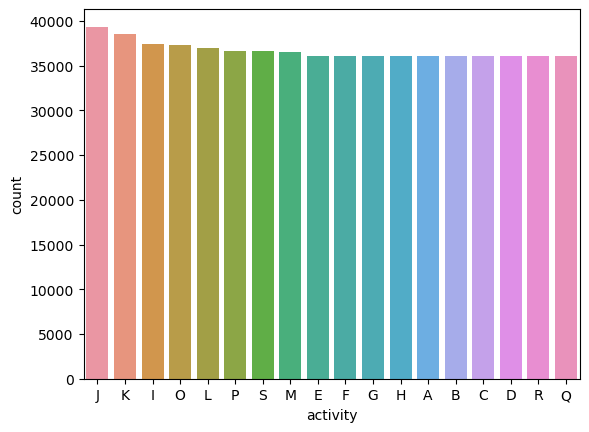

In [5]:
# raw data from gyroscope


df_gyro = pd.concat(df_gyro_list)
sns.countplot(x = 'subject_id',
              data = df_gyro,
              order = df_gyro.subject_id.value_counts().index)

plt.show()
sns.countplot(x = 'activity',
              data = df_gyro,
              order = df_gyro.activity.value_counts().index)

plt.show()

In [440]:
ACTIVITY = 'S'

In [441]:
# split trainning data set and testing data set for acceleration data
list_train = []
list_test = []

for i in range(0,10):
    df_targetsub = df_list[i]
    list_targetsub_train = []
    list_targetsub_test = []
    for a in activities:
        #df_target = df_list[i][df_list[i][''] > 30]
        df_target_act = df_targetsub[df_targetsub['activity'] == a] #Extracting an activity from an subject
        df_target_act = df_target_act.sort_index() # index in order
        # Set activity duration 3 minutes, 3600 rows, training set 0.7, test set 0.3
        df_target_act_train = df_target_act.iloc[0: 2520]
        df_target_act_test = df_target_act.iloc[2520: 3600]
        list_targetsub_train.append(df_target_act_train)
        list_targetsub_test.append(df_target_act_test)
    random.seed(1234) # set random seed Make sure that the accelerometer data and the gyroscope data in the disordered order correspond to each other
    random.shuffle(list_targetsub_train)
    df_targetsub_train = pd.concat(list_targetsub_train)
    df_targetsub_test = pd.concat(list_targetsub_test)
    list_train.append(df_targetsub_train)    
    list_test.append(df_targetsub_test)
random.seed(4321)
random.shuffle(list_train)
df_train = pd.concat(list_train)
df_test = pd.concat(list_test)
df_test = df_test.reset_index(drop=True)

print(df_train)
print(df_test)
        
        
        

       subject_id activity        timestamp          x          y         z
62447        1609        R  853222940838903  -9.906459  -2.686593 -4.251055
62448        1609        R  853222990338903  -7.303961  -3.323451  0.783951
62449        1609        R  853223039838903   0.189890  -5.478233 -3.336470
62450        1609        R  853223089338903 -11.417200  -2.813486  2.428768
62451        1609        R  853223138838903  -4.203470  -2.854188  4.796633
...           ...      ...              ...        ...        ...       ...
49394        1604        O  697281956234288  -0.460136  -8.232014  3.229778
49395        1604        O  697282006162878  -2.176778 -10.489746 -0.296881
49396        1604        O  697282056091468  -2.842366  -7.796269 -3.114857
49397        1604        O  697282106020058  -2.195932 -10.698041 -7.331046
49398        1604        O  697282155948648  -2.284517 -10.312575 -8.779537

[453600 rows x 6 columns]
        subject_id activity        timestamp          x      

In [442]:
# split trainning data set and testing data set for gyroscope data
list_train_gyro = []
list_test_gyro = []

for i in range(0,10):
    df_targetsub_gyro = df_gyro_list[i]
    list_targetsub_train_gyro = []
    list_targetsub_test_gyro = []
    for a in activities:
        #df_target = df_list[i][df_list[i][''] > 30]
        df_target_act_gyro = df_targetsub_gyro[df_targetsub_gyro['activity'] == a] #Extracting an activity from an subject
        df_target_act_gyro = df_target_act_gyro.sort_index() # index in order
        # Set activity duration 3 minutes, 3600 rows, training set 0.7, test set 0.3
        df_target_act_train_gyro = df_target_act_gyro.iloc[0: 2520]
        df_target_act_test_gyro = df_target_act_gyro.iloc[2520: 3600]
        list_targetsub_train_gyro.append(df_target_act_train_gyro)
        list_targetsub_test_gyro.append(df_target_act_test_gyro)
    random.seed(1234)# set random seed Make sure that the accelerometer data and the gyroscope data in the disordered order correspond to each other
    random.shuffle(list_targetsub_train_gyro)
    df_targetsub_train_gyro = pd.concat(list_targetsub_train_gyro)
    df_targetsub_test_gyro = pd.concat(list_targetsub_test_gyro)
    list_train_gyro.append(df_targetsub_train_gyro)    
    list_test_gyro.append(df_targetsub_test_gyro)
random.seed(4321)
random.shuffle(list_train_gyro)
df_train_gyro = pd.concat(list_train_gyro)
df_test_gyro = pd.concat(list_test_gyro)
df_test_gyro = df_test_gyro.reset_index(drop=True)

print(df_train_gyro)
print(df_test_gyro)
        

       subject_id activity        timestamp         x         y         z
62425        1609        R  853222990338903 -1.802015 -3.373788 -0.176398
62426        1609        R  853223039838903  0.492564  1.548799  0.272079
62427        1609        R  853223089338903  3.352799 -1.091992  1.791146
62428        1609        R  853223138838903 -0.977501  1.456121 -0.170006
62429        1609        R  853223188338903  1.330927  1.164238  0.215620
...           ...      ...              ...       ...       ...       ...
49370        1604        O  697282006162878 -4.957749  1.177344  2.264501
49371        1604        O  697282056091468 -4.879985  0.889723  2.347591
49372        1604        O  697282106020058 -5.464815  0.180257  2.165431
49373        1604        O  697282155948648 -3.227754 -0.468493  1.994989
49374        1604        O  697282205877238 -1.433849 -0.945731  1.744652

[453600 rows x 6 columns]
        subject_id activity        timestamp         x         y         z
0         

In [443]:



def single_activity(df_tn,df_tt, act):
    df_train_single_act = df_tn[df_tn['activity'] == act]
    df_test_single_act = df_tt[df_tt['activity'] == act]
    df_train_single_act = df_train_single_act.reset_index(drop=True)
    df_test_single_act = df_test_single_act.reset_index(drop=True)
    return df_train_single_act,df_test_single_act
df_train, df_test = single_activity(df_train,df_test, ACTIVITY)
df_train_gyro, df_test_gyro = single_activity(df_train_gyro, df_test_gyro, ACTIVITY)
print(df_train)
print(df_test)
print(df_train_gyro)
print(df_test_gyro)
        

       subject_id activity        timestamp         x          y         z
0            1609        S  853003636071644 -2.853140 -14.985608  3.340959
1            1609        S  853003685571644  0.558597  -9.047988  7.018453
2            1609        S  853003735071644 -2.242619  -3.687370  6.874801
3            1609        S  853003784571644 -4.117279  -2.808698  6.860436
4            1609        S  853003834071644 -1.466897  -5.080795  8.019229
...           ...      ...              ...       ...        ...       ...
25195        1604        S  696108832056264  8.791059  -1.307982  4.848259
25196        1604        S  696108881984684  8.245182  -0.776470  6.804321
25197        1604        S  696108931913104  8.223634  -4.465934  8.473080
25198        1604        S  696108981841524  7.481432  -3.031807  8.094796
25199        1604        S  696109031769944  6.621913  -6.149058  6.663063

[25200 rows x 6 columns]
       subject_id activity        timestamp         x          y         z

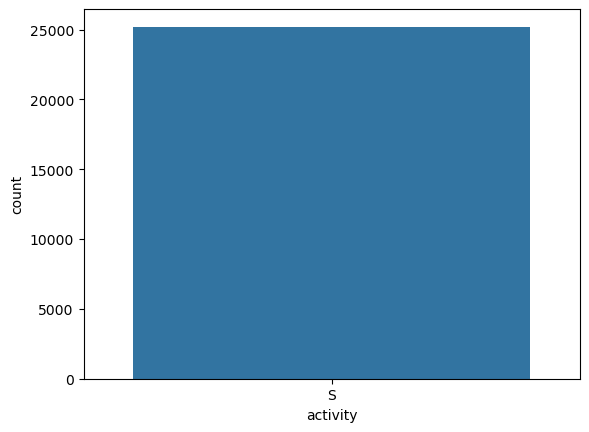

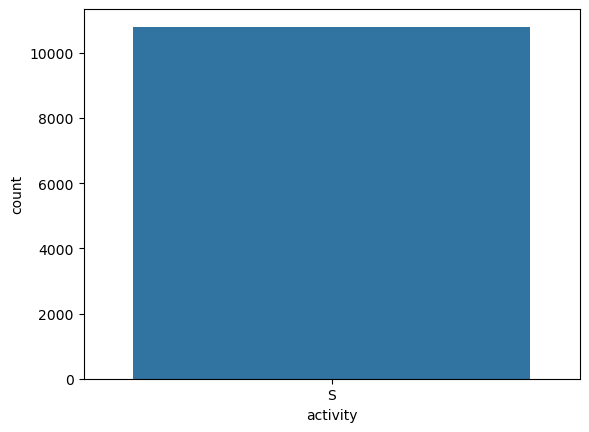

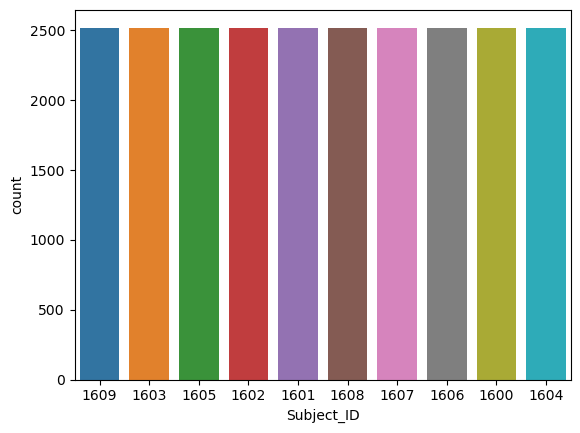

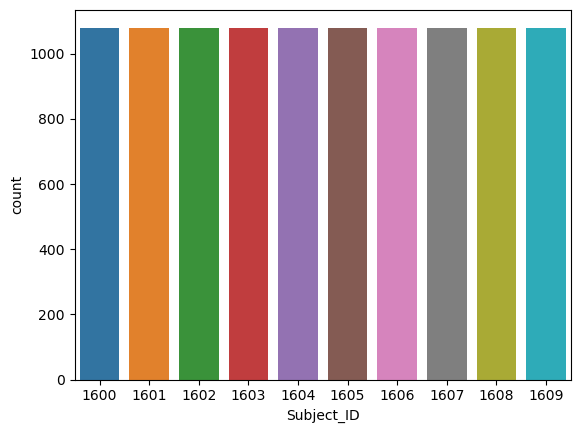

In [444]:
# shows the activity count on training set
sns.countplot(x = 'activity',
              data = df_train,
              order = df_train.activity.value_counts().index)

plt.show()

# shows the activity count on testing set
sns.countplot(x = 'activity',
              data = df_test,
              order = df_test.activity.value_counts().index)

plt.show()
# shows the subject count on trainning set
sns.countplot(x = 'subject_id',
              data = df_train,
              order = df_train.subject_id.value_counts().index)
plt.xlabel('Subject_ID')


plt.show()
# shows the subject count on testing set
sns.countplot(x = 'subject_id',
              data = df_test,
              order = df_test.subject_id.value_counts().index)
plt.xlabel('Subject_ID')

plt.show()

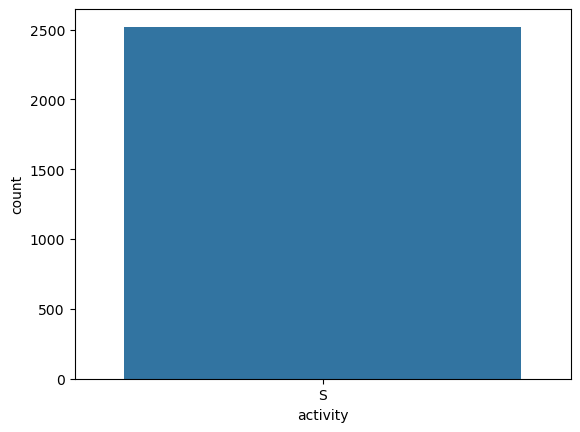

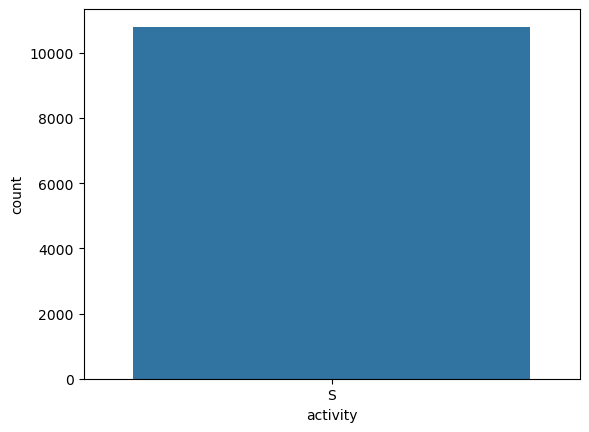

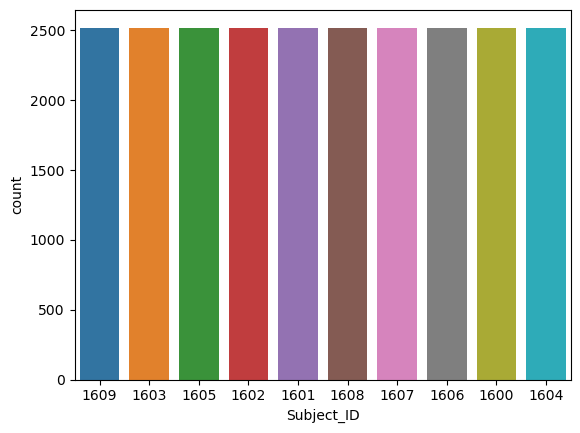

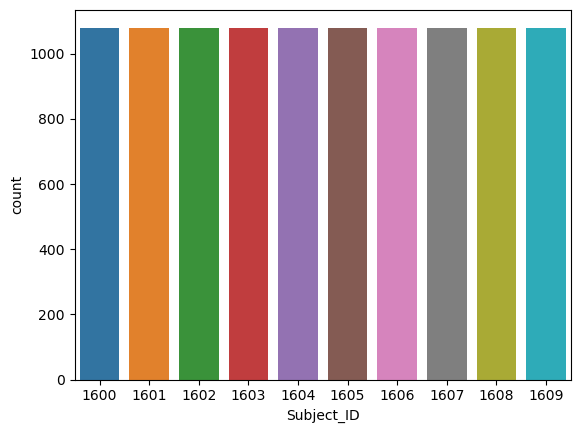

In [445]:
# shows the activity count on training set
sns.countplot(x = 'activity',
              data = df_train_gyro[df_train_gyro['subject_id'] == 1600],
              order = df_train_gyro.activity.value_counts().index)

plt.show()

# shows the activity count on testing set
sns.countplot(x = 'activity',
              data = df_test,
              order = df_test_gyro.activity.value_counts().index)

plt.show()
# shows the subject count on trainning set
sns.countplot(x = 'subject_id',
              data = df_train_gyro,
              order = df_train_gyro.subject_id.value_counts().index)
plt.xlabel('Subject_ID')



plt.show()
# shows the subject count on testing set
sns.countplot(x = 'subject_id',
              data = df_test,
              order = df_test_gyro.subject_id.value_counts().index)
plt.xlabel('Subject_ID')

plt.show()

In [446]:
from sklearn.preprocessing import RobustScaler

scale_columns = ['x', 'y', 'z']

scaler = RobustScaler()

scaler = scaler.fit(df_train[scale_columns].values)



df_train.loc[:,scale_columns] = scaler.transform(df_train[scale_columns].to_numpy())
df_test.loc[:, scale_columns] = scaler.transform(df_test[scale_columns].to_numpy())

In [447]:
from sklearn.preprocessing import RobustScaler

scale_columns = ['x', 'y', 'z']

scaler = RobustScaler()

scaler = scaler.fit(df_train_gyro[scale_columns].values)


# df_train.loc[:,['hand_acc1_x_axis']].values = a.reshape(-1,1).tolist()

#df_train.loc[:, ['hand_acc1_x_axis']] = a.reshape(-1,1).tolist()

df_train_gyro.loc[:,scale_columns] = scaler.transform(df_train_gyro[scale_columns].to_numpy())
df_test_gyro.loc[:,scale_columns] = scaler.transform(df_test_gyro[scale_columns].to_numpy())

In [448]:
print(df_train_gyro[scale_columns].describe())
print(df_train[scale_columns].describe())

                  x             y             z
count  25200.000000  25200.000000  25200.000000
mean      -0.014865     -0.019221     -0.029017
std        1.143197      1.053456      1.001593
min       -8.930200    -11.562224    -11.494058
25%       -0.511872     -0.520408     -0.508381
50%        0.000000      0.000000      0.000000
75%        0.488128      0.479592      0.491619
max        9.003545      6.509169      6.193376
                  x             y             z
count  25200.000000  25200.000000  25200.000000
mean       0.007995      0.029407     -0.049456
std        0.599996      0.811892      0.704961
min       -2.132446     -2.682714     -2.850452
25%       -0.489000     -0.479150     -0.528797
50%        0.000000      0.000000      0.000000
75%        0.511000      0.520850      0.471203
max        1.828737      5.041409      2.346291


In [449]:
# create sliding windows

from scipy import stats

def create_dataset_timesegment(X, y, timesteps, overlap_rate):
    Xs, ys = [], []
    step = int(timesteps * (1 - overlap_rate))
    num_timesteps = (len(X) - timesteps) // step + 1

    for i in range(num_timesteps):
        start = i * step
        end = start + timesteps
        
        v= X.iloc[start:end].values
        labels = y.iloc[start: end]
        ys.append(stats.mode(labels)[0][0])
        Xs.append(v)
    return np.array(Xs), np.array(ys).reshape(-1, 1)

   
   



overlap_rate = 0.5
timesteps = 180
    
X_train, y_train = create_dataset_timesegment(
    df_train[['x', 'y', 'z']], 
    df_train.subject_id,

    timesteps,
    overlap_rate
)


X_test, y_test = create_dataset_timesegment(
    df_test[['x', 'y', 'z']], 
    df_test.subject_id,

    timesteps,
    overlap_rate
)


C:\Users\hp\AppData\Local\Temp\ipykernel_22524\1631608645.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
C:\Users\hp\AppData\Local\Temp\ipykernel_22524\1631608645.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.app

In [450]:




    
overlap_rate = 0.5

timesteps = 180
    
X_train_gyro, y_train_gyro = create_dataset_timesegment(
    
    df_train_gyro[['x', 'y', 'z']], 
    df_train_gyro.subject_id,
    timesteps,
    overlap_rate
)


X_test_gyro, y_test_gyro = create_dataset_timesegment(
    
    df_test_gyro[['x', 'y', 'z']], 
    df_test_gyro.subject_id,
    timesteps,
    overlap_rate
)

C:\Users\hp\AppData\Local\Temp\ipykernel_22524\1631608645.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
C:\Users\hp\AppData\Local\Temp\ipykernel_22524\1631608645.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.app

In [451]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train_gyro.shape, y_train_gyro.shape)
print(X_test_gyro.shape, y_test_gyro.shape)


(279, 180, 3) (279, 1)
(119, 180, 3) (119, 1)
(279, 180, 3) (279, 1)
(119, 180, 3) (119, 1)


In [452]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(279, 180, 3) (279, 10)
(119, 180, 3) (119, 10)


In [453]:
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [454]:
from keras.layers import Input, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Concatenate,LSTM,Reshape,GlobalAveragePooling1D,BatchNormalization
from keras.models import Model

input_shape = (180, 3)

# Define model architecture for acceleration data
acc_input = Input(input_shape)
x1 = LSTM(units= 90, return_sequences=True)(acc_input)
x1 = Dropout(rate=0.3)(x1)
x1 = LSTM(units= 90,  return_sequences=True)(x1)
x1 = Dropout(rate=0.3)(x1)
x1 = Conv1D(filters=16, kernel_size=3, activation='relu')(x1)
x1 = MaxPooling1D(pool_size=2)(x1)
x1 = Conv1D(filters=32, kernel_size=3, activation='relu')(x1)
x1 = MaxPooling1D(pool_size=2)(x1)
x1 = Conv1D(filters=64, kernel_size=3, activation='relu')(x1)
x1 = MaxPooling1D(pool_size=2)(x1)
x1 = Conv1D(filters=128, kernel_size=3, activation='relu')(x1)
x1 = MaxPooling1D(pool_size=2)(x1)
x1 = Dropout(rate=0.3)(x1)
#x1 = Flatten()(x1)


# Define model architecture for gyroscope data
gyro_input = Input(input_shape)
x2 = LSTM(units= 90, return_sequences=True)(gyro_input)
x2 = Dropout(rate=0.3)(x2)
x2 = LSTM(units= 90, return_sequences=True)(x2)
x2 = Dropout(rate=0.3)(x2)
x2 = Conv1D(filters=16, kernel_size=3, activation='relu')(x2)
x2 = MaxPooling1D(pool_size=2)(x2)
x2 = Conv1D(filters=32, kernel_size=3, activation='relu')(x2)
x2 = MaxPooling1D(pool_size=2)(x2)
x2 = Conv1D(filters=64, kernel_size=3, activation='relu')(x2)
x2 = MaxPooling1D(pool_size=2)(x2)
x2 = Conv1D(filters=128, kernel_size=3, activation='relu')(x2)
x2 = MaxPooling1D(pool_size=2)(x2)
x2 = Dropout(rate=0.3)(x2)
#x2 = Flatten()(x2)


# Merge acceleration and gyroscope branches
merged = Concatenate()([x1, x2])

# Add fully connected layers

x = GlobalAveragePooling1D()(merged)
x = BatchNormalization()(x)
output = Dense(y_train.shape[1], activation='softmax')(x)

# Create the model
model_LSTM_CNN = Model(inputs=[acc_input, gyro_input], outputs=output)

# Compile the model
model_LSTM_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Model summary
model_LSTM_CNN.summary()

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_49 (InputLayer)          [(None, 180, 3)]     0           []                               
                                                                                                  
 input_50 (InputLayer)          [(None, 180, 3)]     0           []                               
                                                                                                  
 lstm_96 (LSTM)                 (None, 180, 90)      33840       ['input_49[0][0]']               
                                                                                                  
 lstm_98 (LSTM)                 (None, 180, 90)      33840       ['input_50[0][0]']               
                                                                                           

In [455]:
history = model_LSTM_CNN.fit(
    [X_train,X_train_gyro],
    y_train,
    epochs=30,
    batch_size=56
   
    
)

Epoch 1/30
5/5 [==============================] - 5s 62ms/step - loss: 2.0163 - acc: 0.3154
Epoch 2/30
5/5 [==============================] - 0s 57ms/step - loss: 1.3577 - acc: 0.6129
Epoch 3/30
5/5 [==============================] - 0s 51ms/step - loss: 0.9885 - acc: 0.7025
Epoch 4/30
5/5 [==============================] - 0s 57ms/step - loss: 0.8091 - acc: 0.7563
Epoch 5/30
5/5 [==============================] - 0s 58ms/step - loss: 0.6329 - acc: 0.8280
Epoch 6/30
5/5 [==============================] - 0s 52ms/step - loss: 0.5202 - acc: 0.8423
Epoch 7/30
5/5 [==============================] - 0s 58ms/step - loss: 0.4117 - acc: 0.8925
Epoch 8/30
5/5 [==============================] - 0s 55ms/step - loss: 0.3413 - acc: 0.9176
Epoch 9/30
5/5 [==============================] - 0s 55ms/step - loss: 0.2568 - acc: 0.9319
Epoch 10/30
5/5 [==============================] - 0s 56ms/step - loss: 0.2092 - acc: 0.9534
Epoch 11/30
5/5 [==============================] - 0s 54ms/step - loss: 0.1821 

In [456]:
# plt.plot(history.history['loss'], label='train')
# plt.xlabel('Epoch')
# plt.ylabel('Loss' )
# plt.legend();
# plt.savefig('LSTMCNN_loss.svg', format='svg')

In [457]:
y_pred = model_LSTM_CNN.predict([X_test,X_test_gyro])

4/4 [==============================] - 1s 24ms/step


In [458]:
# Compute the predicted class labels from the predicted outputs
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute the accuracy rate of the model
accuracy = np.mean(y_pred_classes == y_test_classes)
print(accuracy)

0.8571428571428571


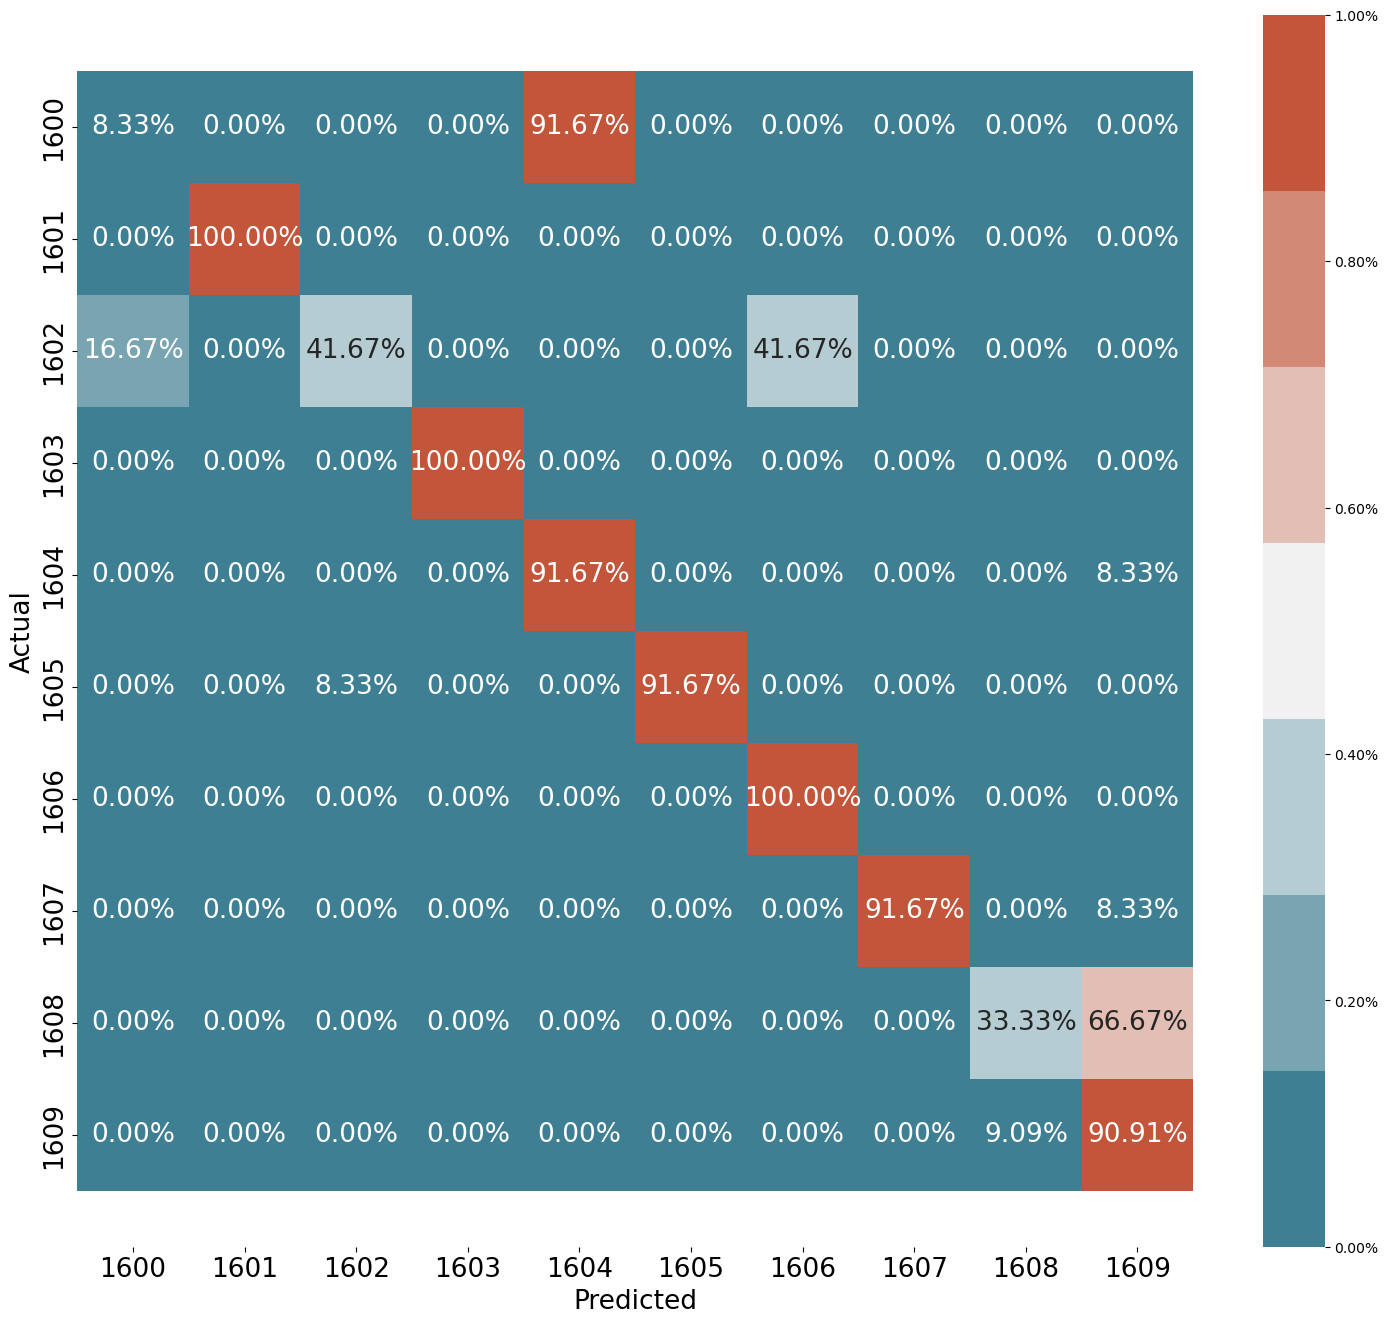

In [211]:
def plot_cm(y_true, y_pred, class_names, fontsize=19):
    cm = confusion_matrix(y_true, y_pred, normalize='true')  # normalize the confusion matrix by true labels
    fig, ax = plt.subplots(figsize=(18, 16)) 
    ax = sns.heatmap(
        cm, 
        annot=True, 
        fmt=".2%",  # set the format of the annotations to two decimal places with a percentage symbol
        cmap=sns.diverging_palette(220, 20, n=7),
        ax=ax,
        cbar_kws={'format': '%.2f%%'},  # set the format of the colorbar annotations to two decimal places with a percentage symbol
        annot_kws={"fontsize":fontsize}  # set the font size of the annotations
    )

    plt.ylabel('Actual', fontsize=fontsize)
    plt.xlabel('Predicted', fontsize=fontsize)
    ax.set_xticklabels(class_names, fontsize=fontsize)
    ax.set_yticklabels(class_names, fontsize=fontsize)
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    
    
plot_cm(
  enc.inverse_transform(y_test),
  enc.inverse_transform(y_pred),
  enc.categories_[0]
)